<a href="https://colab.research.google.com/github/LucaswasTaken/NES-DataScience/blob/main/Aula%2012/Aula_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de Dimensionalidade

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tutorials/blob/master/Scikit-Learn-Tutorial/8.%20Dimensionality%20Reduction.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tutorials/blob/master/Scikit-Learn-Tutorial/8.%20Dimensionality%20Reduction.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver código no GitHub</a>
</td></table>

![Scikit Learn Logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## O que é Redução de Dimensionalidade?

A Redução de Dimensionalidade é o processo de reduzir o número de características ou variáveis. Ao reduzir o número de dimensões no seu espaço de características, você tem menos relações entre variáveis para considerar e é menos provável que ocorra overfitting no seu modelo. Também ajuda na visualização de dados porque você pode reduzir a dimensionalidade para 1-3 dimensões para visualizar facilmente.

A Redução de Dimensionalidade pode ser dividida em dois grupos:
<ul>
    <li>Seleção de Características</li>
    <li>Extração de Características</li>
</ul>

<b>Seleção de Características</b> faz o que o nome sugere. Tenta encontrar um subconjunto das características originais. Existem três estratégias para selecionar características. Há a estratégia de filtro, wrapper e incorporada. A Seleção de Características tem algumas vantagens e desvantagens em relação à extração de características. As vantagens da seleção de características incluem sua simplicidade e interpretabilidade das características. Uma de suas desvantagens é que você perde toda a informação das características que descartou, o que possivelmente resulta em pior precisão.

<b>Extração de Características</b> criamos novas características que são combinações de todas as características antigas. Ordenamos as novas características por quão bem elas ajudam a prever a variável dependente (y). Assim, podemos reduzir a dimensionalidade escolhendo quantas das novas características manter e quantas das características menos importantes excluir. Mas mesmo que estejamos excluindo algumas das novas características, ainda estamos mantendo a maior parte da informação porque as novas características são combinações de todas as características antigas.

## Análise de Componentes Principais (PCA)

A análise de componentes principais é uma técnica para extração de características. Ela cria novas características combinando nossas características de entrada de uma maneira específica.

### Como funciona

1. Normalizar os dados (média 0 e desvio padrão 1)
2. Calcular matriz de <a href="https://en.wikipedia.org/wiki/Covariance">covariância</a>.
3. Calcular autovetores e autovalores
4. Ordenar autovalores e seus respectivos autovetores
5. Escolher nova dimensionalidade (selecionando os primeiros k autovetores)
6. Transformar dados originais

### Maneiras de escolher a nova dimensionalidade

1. Selecionar um número arbitrário de características (dimensões)
2. Selecionar um limiar de <a href="https://en.wikipedia.org/wiki/Variance">variância</a> para manter e adicionar características até atingir o limiar

## Usando PCA no Scikit Learn

O Scikit Learn tem múltiplas versões de PCA. Tem o PCA normal, IncrementalPCA que permite computações parciais (então você não precisa carregar todo o conjunto de dados na memória), KernelPCA que permite redução de dimensionalidade não-linear através do uso de kernels, bem como duas versões de SparsePCA cujo objetivo é a extração do conjunto de componentes esparsos que melhor reconstroem os dados.

In [1]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'rotulo'])
iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,rotulo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
import numpy as np

X = np.array(iris.drop(['rotulo'], axis=1))
y = np.array(iris['rotulo'])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # n_components especifica a nova dimensionalidade
X_reduced = pca.fit(X).transform(X) # ou apenas pca.fit_transform(X)
X_reduced = pd.DataFrame(data=X_reduced, columns=['x', 'y'])

In [4]:
X_reduced.head()

,x,y
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [5]:
print('Componentes:', pca.components_)
print('Variância Explicada:', pca.explained_variance_)
print('Proporção da Variância Explicada:', pca.explained_variance_ratio_ )

Componentes: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Variância Explicada: [4.22484077 0.24224357]
Proporção da Variância Explicada: [0.92461621 0.05301557]


<Axes: xlabel='x', ylabel='y'>

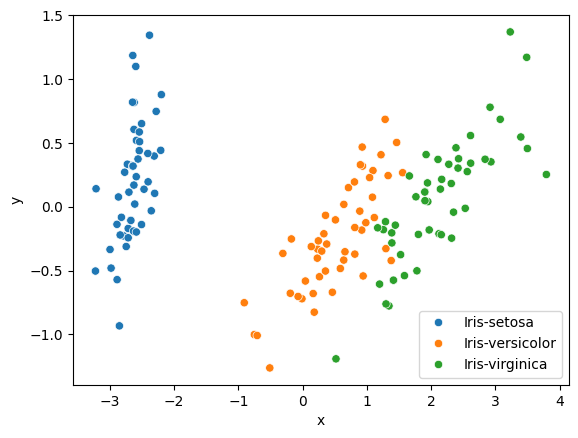

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

<Axes: xlabel='x', ylabel='y'>

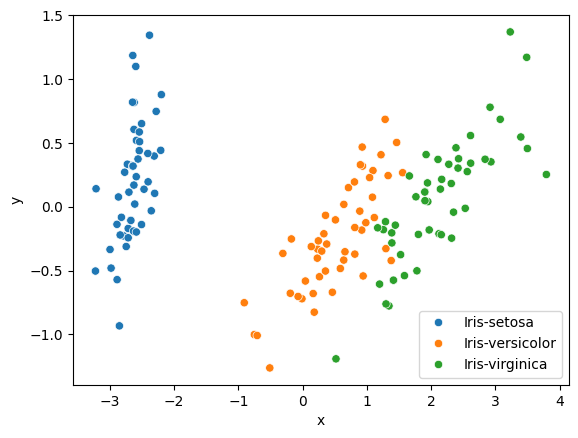

In [7]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=3) # batch_size especifica o número de amostras por lote
X_reduced = pca.fit(X).transform(X) # ou apenas pca.fit_transform(X)
X_reduced = pd.DataFrame(data=X_reduced, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

O Kernel PCA é capaz de encontrar uma projeção dos dados que os torna linearmente separáveis.

<Axes: xlabel='0', ylabel='1'>

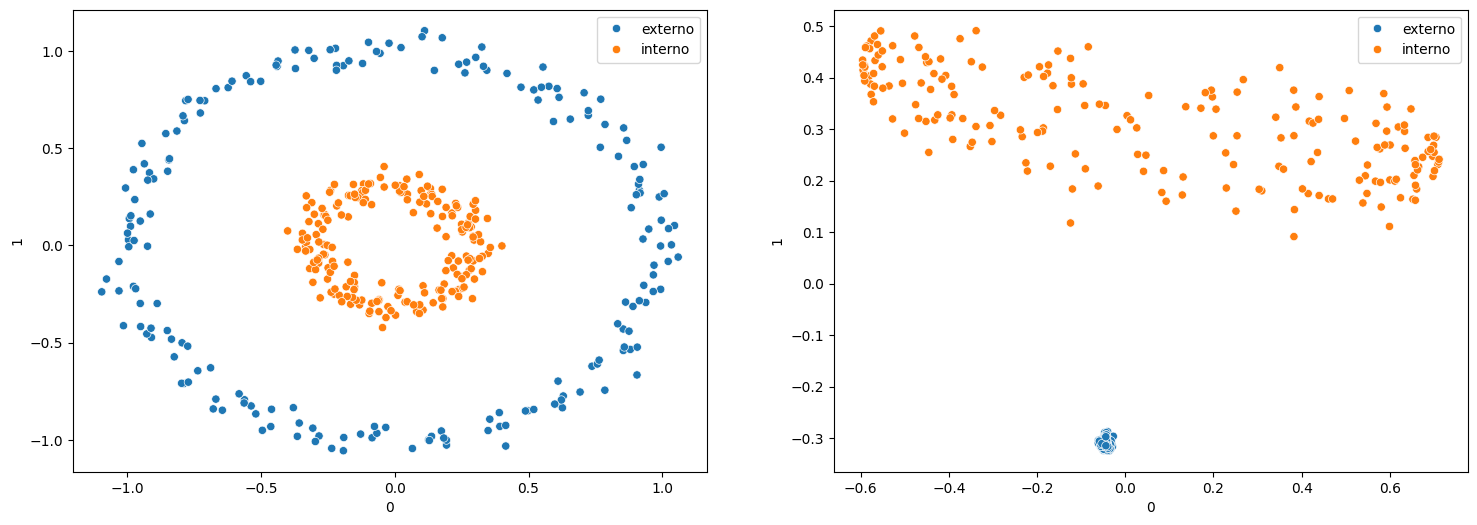

In [8]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)
y = np.array(['externo' if y_==0 else 'interno' for y_ in y])
kpca = KernelPCA(kernel="rbf", gamma=10) # gamma é o coeficiente do Kernel.
X_kpca = kpca.fit(X).transform(X)
X_kpca = pd.DataFrame(X_kpca)
X = pd.DataFrame(X)
fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.scatterplot(x=0, y=1, hue=y, data=X, ax=ax[0])
sns.scatterplot(x=0, y=1, hue=y, data=X_kpca, ax=ax[1])

## Recursos

<ul>
    <li><a href="http://scikit-learn.org/stable/modules/decomposition.html#decompositions">Redução de Dimensionalidade (Documentação Scikit Learn)</a></li>
    <li><a href="http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html">PCA para Dataset Iris (Documentação Scikit Learn)</a></li>
    <li><a href="https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c">Um Guia Completo para Análise de Componentes Principais (Matt Brems)</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Dimensionality_reduction">Redução de Dimensionalidade (Wikipedia)</a></li>
    <li><a href="http://setosa.io/ev/principal-component-analysis/">Análise de Componentes Principais Explicada Visualmente (setosa.io por Victor Powell e Lewis Lehe)
</a></li>
</ul>

## Conclusão

Essa foi uma visão geral rápida sobre Redução de Dimensionalidade com PCA e como implementá-la no Scikit Learn.
Espero que tenha gostado deste tutorial. Se gostou, considere se inscrever no meu <a href="https://www.youtube.com/channel/UCBOKpYBjPe2kD8FSvGRhJwA">Canal do YouTube</a> ou me seguir nas Redes Sociais. Se tiver alguma pergunta, sinta-se à vontade para entrar em contato comigo.

# Técnicas Avançadas de Redução de Dimensionalidade

Embora o PCA seja uma excelente técnica linear de redução de dimensionalidade, existem cenários onde relações não-lineares nos dados requerem abordagens mais sofisticadas. Nesta seção, exploraremos **t-SNE (t-Distributed Stochastic Neighbor Embedding)** e **UMAP (Uniform Manifold Approximation and Projection)**, duas poderosas técnicas não-lineares de redução de dimensionalidade.

## Quando usar técnicas não-lineares?

- **Estruturas de dados complexas**: Quando os dados têm relações não-lineares
- **Visualização**: Para explorar a estrutura de dados de alta dimensão
- **Agrupamento**: Quando você precisa preservar a estrutura de vizinhança local
- **Conjuntos de dados do mundo real**: Imagens, texto, genômica, onde suposições lineares não se aplicam

In [9]:
# Vamos trabalhar com um conjunto de dados mais complexo - o dataset digits do sklearn
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o dataset digits (imagens 8x8 de dígitos manuscritos)
digits = load_digits()
X_digits = digits.data  # 64 características (valores de pixels 8x8)
y_digits = digits.target  # 10 classes (dígitos 0-9)

print(f"Formato do dataset: {X_digits.shape}")
print(f"Número de classes: {len(np.unique(y_digits))}")
print(f"Faixa de características: {X_digits.min():.2f} até {X_digits.max():.2f}")

# Padroniza as características
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

Formato do dataset: (1797, 64)
Número de classes: 10
Faixa de características: 0.00 até 16.00


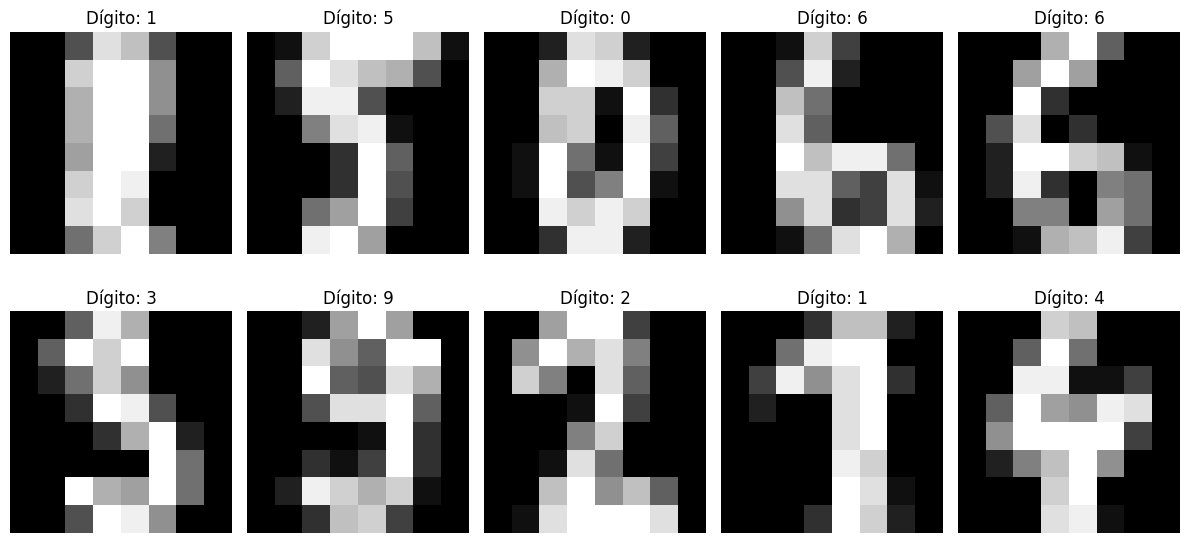

In [10]:
# Vamos visualizar algumas imagens de exemplo
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Seleciona uma amostra aleatória
    idx = np.random.randint(0, len(X_digits))
    image = X_digits[idx].reshape(8, 8)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Dígito: {y_digits[idx]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Proporção da Variância Explicada pelo PCA: [0.12033916 0.09561054]
Variância Total Explicada: 0.216


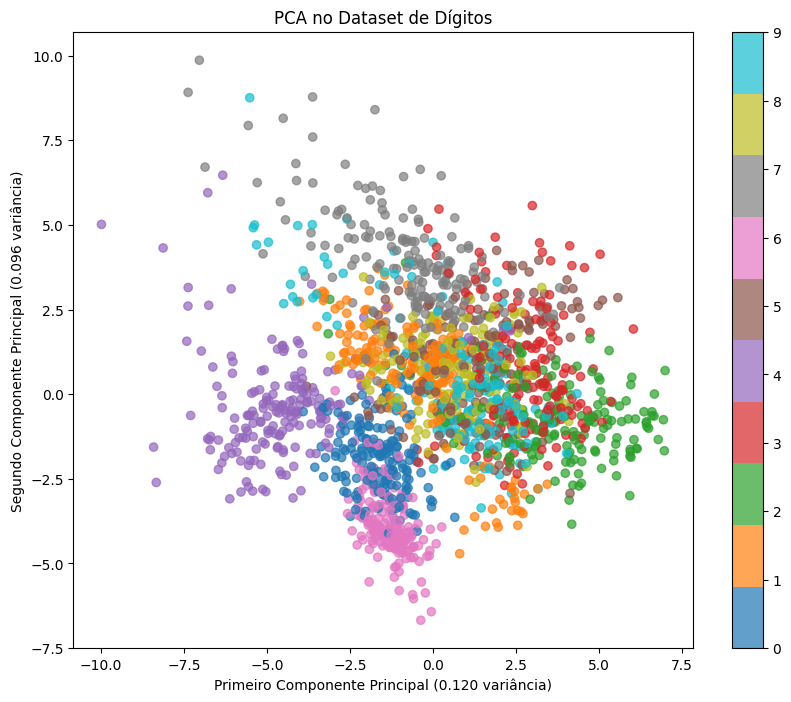

In [11]:
# Primeiro, vamos ver como o PCA se comporta neste conjunto de dados complexo
from sklearn.decomposition import PCA

# Aplica PCA para reduzir para 2 componentes
pca_digits = PCA(n_components=2, random_state=42)
X_pca = pca_digits.fit_transform(X_digits_scaled)

print(f"Proporção da Variância Explicada pelo PCA: {pca_digits.explained_variance_ratio_}")
print(f"Variância Total Explicada: {pca_digits.explained_variance_ratio_.sum():.3f}")

# Visualiza resultados do PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel(f'Primeiro Componente Principal ({pca_digits.explained_variance_ratio_[0]:.3f} variância)')
plt.ylabel(f'Segundo Componente Principal ({pca_digits.explained_variance_ratio_[1]:.3f} variância)')
plt.title('PCA no Dataset de Dígitos')
plt.show()

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

**t-SNE** é uma técnica não-linear de redução de dimensionalidade particularmente adequada para visualização de dados de alta dimensão. Foi desenvolvida por Laurens van der Maaten e Geoffrey Hinton em 2008.

### Como o t-SNE funciona:

1. **Distribuições de probabilidade**: t-SNE converte similaridades entre pontos de dados em probabilidades conjuntas
2. **Espaço de alta dimensão**: Usa distribuição Gaussiana para medir similaridades
3. **Espaço de baixa dimensão**: Usa distribuição t de Student para medir similaridades  
4. **Otimização**: Minimiza a divergência entre as duas distribuições de probabilidade usando gradiente descendente

### Características principais:

- **Excelente para visualização**: Cria gráficos 2D/3D bonitos que revelam a estrutura dos dados
- **Preserva estrutura local**: Pontos similares permanecem próximos
- **Não-linear**: Pode capturar relações complexas que o PCA não consegue
- **Estocástico**: Resultados podem variar entre execuções (use random_state para reprodutibilidade)

### Parâmetros importantes:

- **perplexity**: Controla o equilíbrio entre estrutura local e global (tipicamente 5-50)
- **learning_rate**: Tamanho do passo para otimização (tipicamente 10-1000)
- **n_iter**: Número de iterações para otimização (tipicamente 1000+)

Executando t-SNE com perplexity=5...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completado em 25.61 segundos
Executando t-SNE com perplexity=30...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completado em 13.22 segundos
Executando t-SNE com perplexity=50...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completado em 15.72 segundos


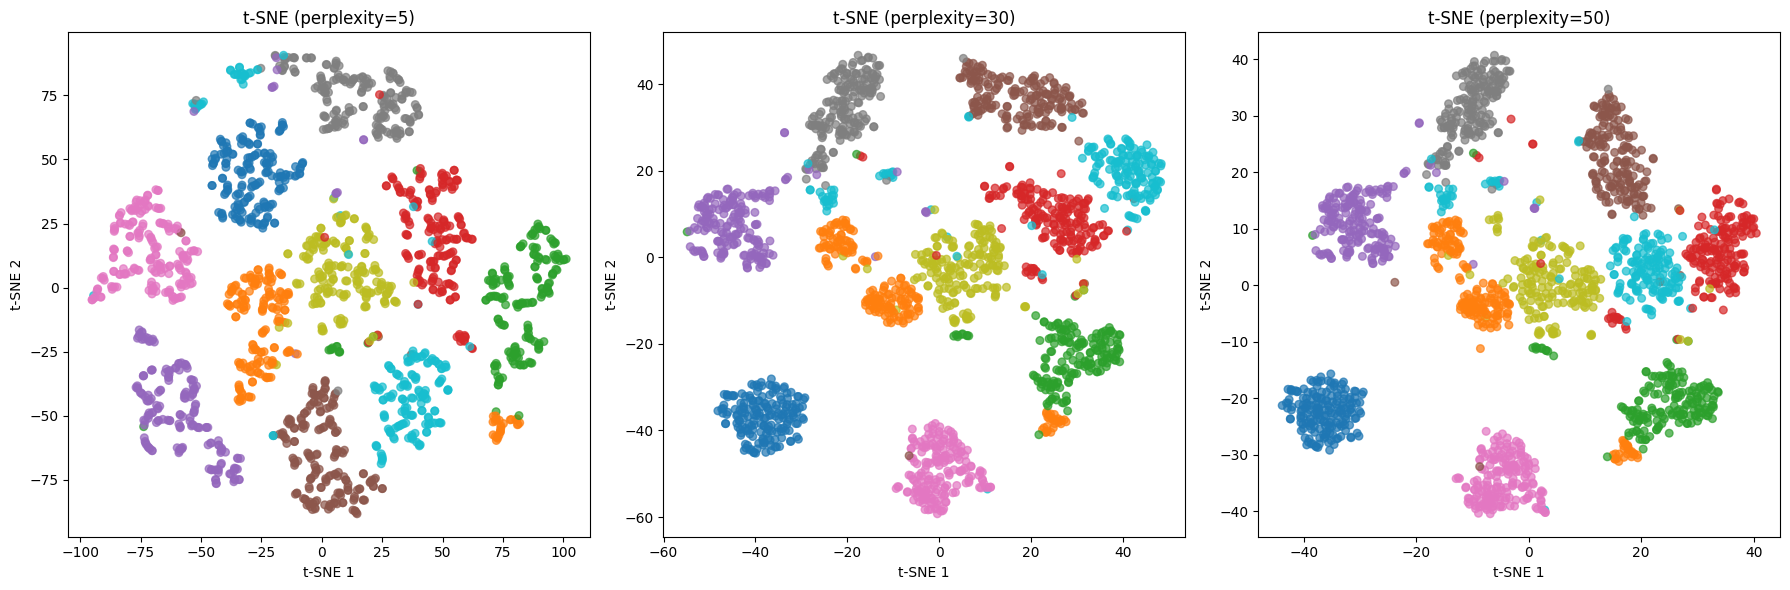

In [12]:
# Aplica t-SNE ao dataset de dígitos
from sklearn.manifold import TSNE
import time

# t-SNE com diferentes valores de perplexity
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, perplexity in enumerate(perplexities):
    print(f"Executando t-SNE com perplexity={perplexity}...")
    start_time = time.time()

    # Aplica t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42,
                n_iter=1000, learning_rate=200)
    X_tsne = tsne.fit_transform(X_digits_scaled)

    elapsed_time = time.time() - start_time
    print(f"t-SNE completado em {elapsed_time:.2f} segundos")

    # Plota resultados
    scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_digits,
                             cmap='tab10', alpha=0.7, s=30)
    axes[i].set_title(f't-SNE (perplexity={perplexity})')
    axes[i].set_xlabel('t-SNE 1')
    axes[i].set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

## UMAP (Uniform Manifold Approximation and Projection)

**UMAP** é uma técnica relativamente nova de redução de dimensionalidade desenvolvida por Leland McInnes em 2018. É baseada em técnicas de aprendizado de variedades e ideias da análise de dados topológicos.

### Como o UMAP funciona:

1. **Aprendizado de variedades**: Assume que os dados estão em uma variedade de menor dimensão
2. **Estrutura topológica**: Constrói uma representação topológica dos dados
3. **Distribuição uniforme**: Projeta para um espaço de menor dimensão preservando a estrutura topológica
4. **Otimização**: Usa gradiente descendente estocástico para otimizar a representação de baixa dimensão

### Principais vantagens do UMAP:

- **Mais rápido que t-SNE**: Especialmente em grandes conjuntos de dados
- **Melhor estrutura global**: Preserva melhor tanto a estrutura local quanto global comparado ao t-SNE
- **Determinístico**: Resultados mais consistentes entre execuções
- **Escalável**: Pode lidar com conjuntos de dados maiores de forma mais eficiente
- **Flexível**: Pode ser usado tanto para visualização quanto para redução de dimensionalidade geral

### Parâmetros importantes:

- **n_neighbors**: Controla estrutura local vs global (tipicamente 2-100)
- **min_dist**: Controla quão densamente os pontos são empacotados no espaço de baixa dimensão
- **metric**: Métrica de distância a usar ('euclidean', 'manhattan', 'cosine', etc.)
- **n_components**: Número de dimensões para reduzir

In [13]:
# Primeiro, vamos instalar o UMAP (se não estiver instalado)
# Execute esta célula se você ainda não instalou o umap-learn
# !pip install umap-learn

# Importa UMAP
try:
    import umap
    print("UMAP importado com sucesso!")
except ImportError:
    print("UMAP não encontrado. Por favor instale usando: pip install umap-learn")
    print("Após a instalação, reinicie o kernel e execute esta célula novamente.")

UMAP importado com sucesso!


Executando UMAP com n_neighbors=5...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completado em 12.70 segundos
Executando UMAP com n_neighbors=15...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completado em 5.19 segundos
Executando UMAP com n_neighbors=50...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completado em 7.58 segundos


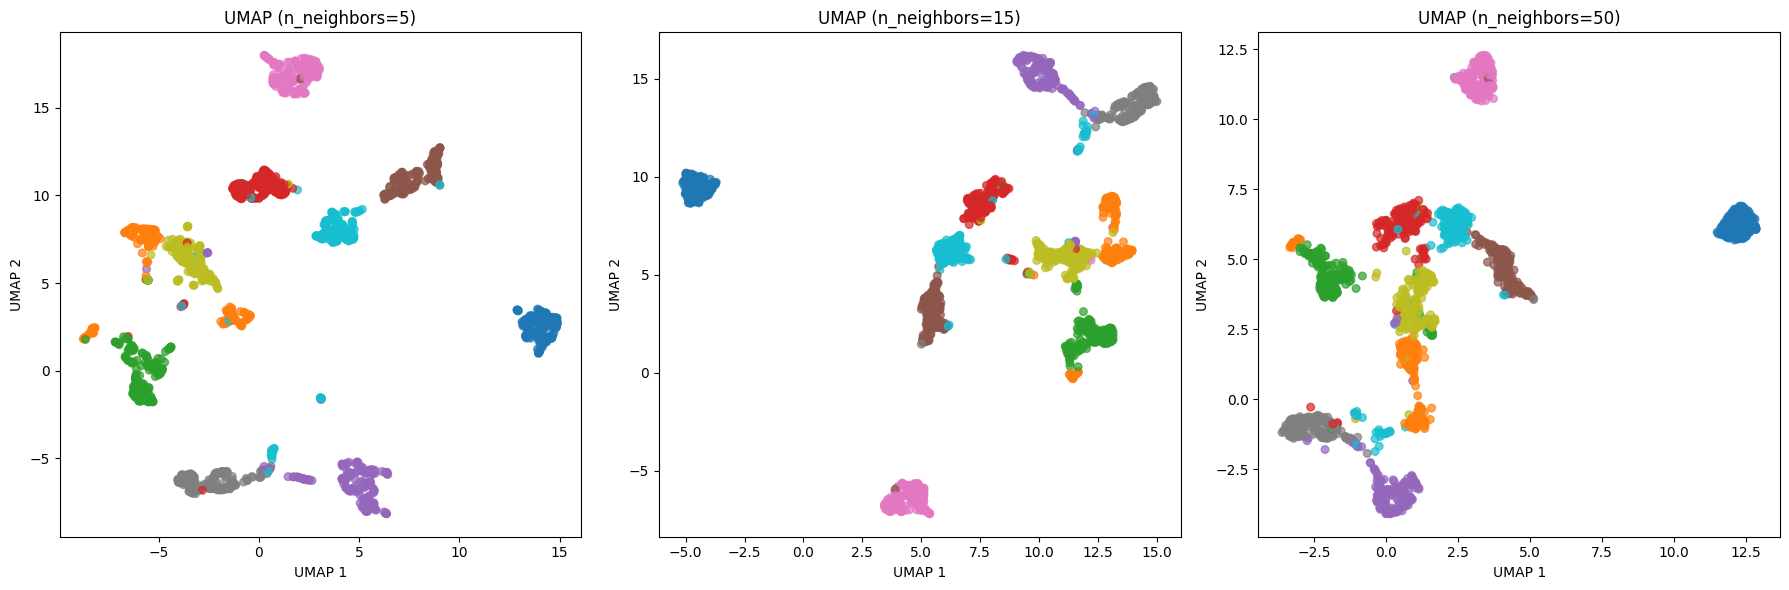

In [14]:
# Aplica UMAP ao dataset de dígitos com diferentes parâmetros
# Nota: Se UMAP não estiver instalado, descomente a linha acima para instalá-lo

try:
    import umap

    # UMAP com diferentes valores de n_neighbors
    n_neighbors_values = [5, 15, 50]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, n_neighbors in enumerate(n_neighbors_values):
        print(f"Executando UMAP com n_neighbors={n_neighbors}...")
        start_time = time.time()

        # Aplica UMAP
        umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1,
                              n_components=2, random_state=42)
        X_umap = umap_model.fit_transform(X_digits_scaled)

        elapsed_time = time.time() - start_time
        print(f"UMAP completado em {elapsed_time:.2f} segundos")

        # Plota resultados
        scatter = axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=y_digits,
                                 cmap='tab10', alpha=0.7, s=30)
        axes[i].set_title(f'UMAP (n_neighbors={n_neighbors})')
        axes[i].set_xlabel('UMAP 1')
        axes[i].set_ylabel('UMAP 2')

    plt.tight_layout()
    plt.show()

except ImportError:
    print("UMAP não disponível. Por favor instale usando:")
    print("pip install umap-learn")
    print("Então reinicie o kernel e execute esta célula novamente.")

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


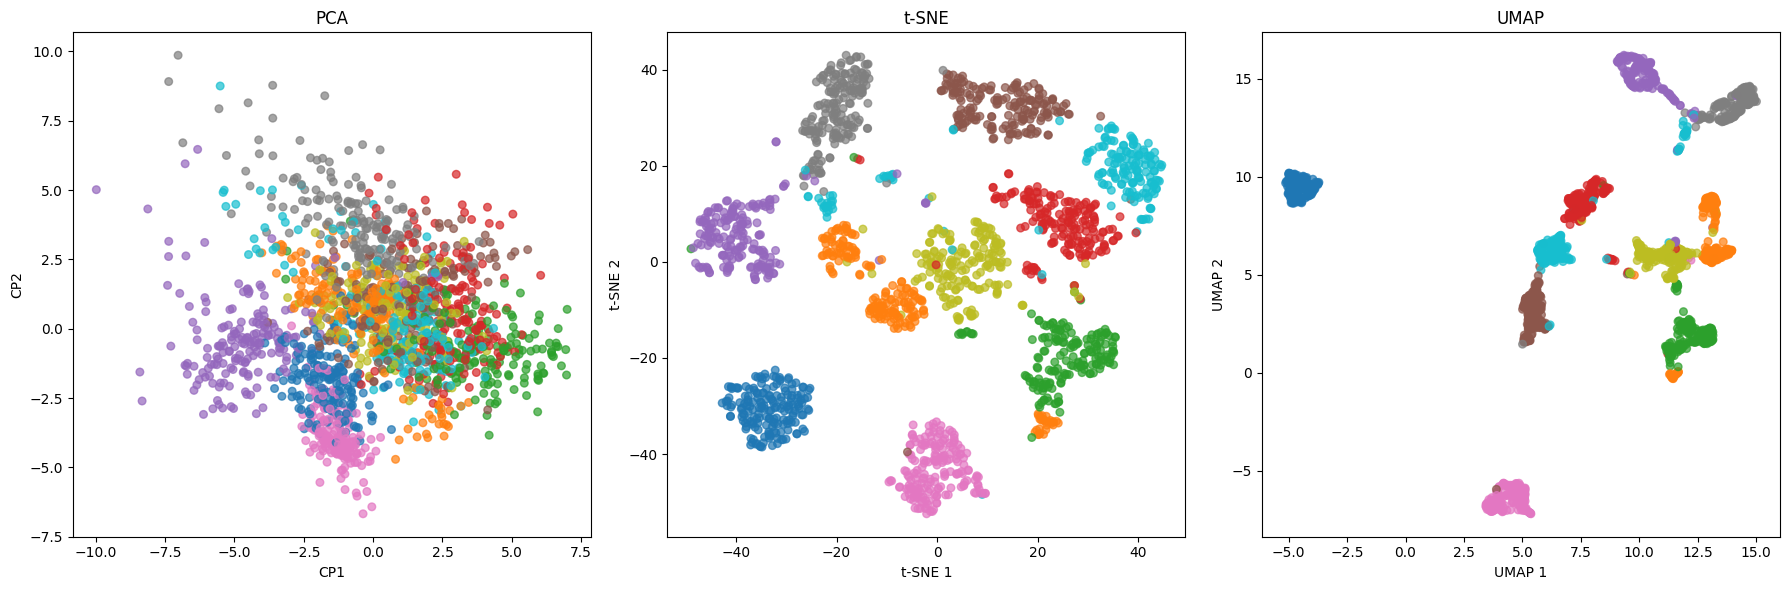

In [15]:
# Vamos comparar todos os três métodos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, cmap='tab10', alpha=0.7, s=30)
axes[0].set_title('PCA')
axes[0].set_xlabel('CP1')
axes[0].set_ylabel('CP2')

# t-SNE (usando perplexity=30 que é comumente usado)
try:
    tsne_final = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
    X_tsne_final = tsne_final.fit_transform(X_digits_scaled)

    scatter2 = axes[1].scatter(X_tsne_final[:, 0], X_tsne_final[:, 1], c=y_digits,
                              cmap='tab10', alpha=0.7, s=30)
    axes[1].set_title('t-SNE')
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')
except:
    axes[1].text(0.5, 0.5, 't-SNE falhou', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('t-SNE (falhou)')

# UMAP (usando n_neighbors=15 como padrão)
try:
    import umap
    umap_final = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    X_umap_final = umap_final.fit_transform(X_digits_scaled)

    scatter3 = axes[2].scatter(X_umap_final[:, 0], X_umap_final[:, 1], c=y_digits,
                              cmap='tab10', alpha=0.7, s=30)
    axes[2].set_title('UMAP')
    axes[2].set_xlabel('UMAP 1')
    axes[2].set_ylabel('UMAP 2')
except:
    axes[2].text(0.5, 0.5, 'UMAP não disponível', ha='center', va='center', transform=axes[2].transAxes)
    axes[2].set_title('UMAP (não disponível)')

plt.tight_layout()
plt.show()

## Comparação de Performance e Análise

### Observações do Dataset de Dígitos:

1. **PCA**:
   - Rápido e determinístico
   - Mostra alguma separação mas as classes se sobrepõem significativamente
   - Captura apenas ~30% da variância total em 2D
   - Bom para entender relações lineares

2. **t-SNE**:
   - Cria clusters distintos e bem separados
   - Excelente para visualização e identificação da estrutura dos dados
   - Tempo de computação mais lento
   - Resultados podem ser sensíveis aos hiperparâmetros

3. **UMAP**:
   - Computação rápida, ainda mais rápida que t-SNE
   - Preserva bem tanto a estrutura local quanto global
   - Resultados mais consistentes entre execuções
   - Bom equilíbrio entre velocidade e qualidade

### Quando Usar Cada Método:

| Método | Melhor para | Prós | Contras |
|--------|----------|------|------|
| **PCA** | Relações lineares, pré-processamento, interpretabilidade | Rápido, determinístico, interpretável | Apenas linear, pode perder padrões complexos |
| **t-SNE** | Visualização, exploração da estrutura dos dados | Clusters excelentes, revela padrões | Lento, estocástico, sensível a parâmetros |
| **UMAP** | Redução de propósito geral, grandes conjuntos de dados | Rápido, preserva estrutura, consistente | Método mais novo, menos estabelecido |

## Exemplo do Mundo Real: Dataset Fashion-MNIST

Vamos aplicar essas técnicas a um conjunto de dados mais desafiador - Fashion-MNIST, que contém imagens em escala de cinza 28x28 de itens de moda em 10 categorias.

In [16]:
# Carrega dataset Fashion-MNIST
from sklearn.datasets import fetch_openml
import numpy as np

# Carrega um subconjunto do Fashion-MNIST para eficiência computacional
print("Carregando dataset Fashion-MNIST...")
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False, parser='auto')

# Pega um subconjunto para computação mais rápida (primeiras 5000 amostras)
n_samples = 5000
X_fashion = fashion_mnist.data[:n_samples]
y_fashion = fashion_mnist.target[:n_samples].astype(int)

# Nomes das classes Fashion-MNIST
class_names = ['Camiseta/blusa', 'Calça', 'Suéter', 'Vestido', 'Casaco',
               'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

print(f"Formato do subconjunto Fashion-MNIST: {X_fashion.shape}")
print(f"Classes: {class_names}")

# Normaliza os dados
X_fashion_scaled = X_fashion / 255.0  # Valores de pixels são 0-255

# Padroniza para melhor performance
scaler_fashion = StandardScaler()
X_fashion_std = scaler_fashion.fit_transform(X_fashion_scaled)

Carregando dataset Fashion-MNIST...
Formato do subconjunto Fashion-MNIST: (5000, 784)
Classes: ['Camiseta/blusa', 'Calça', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']


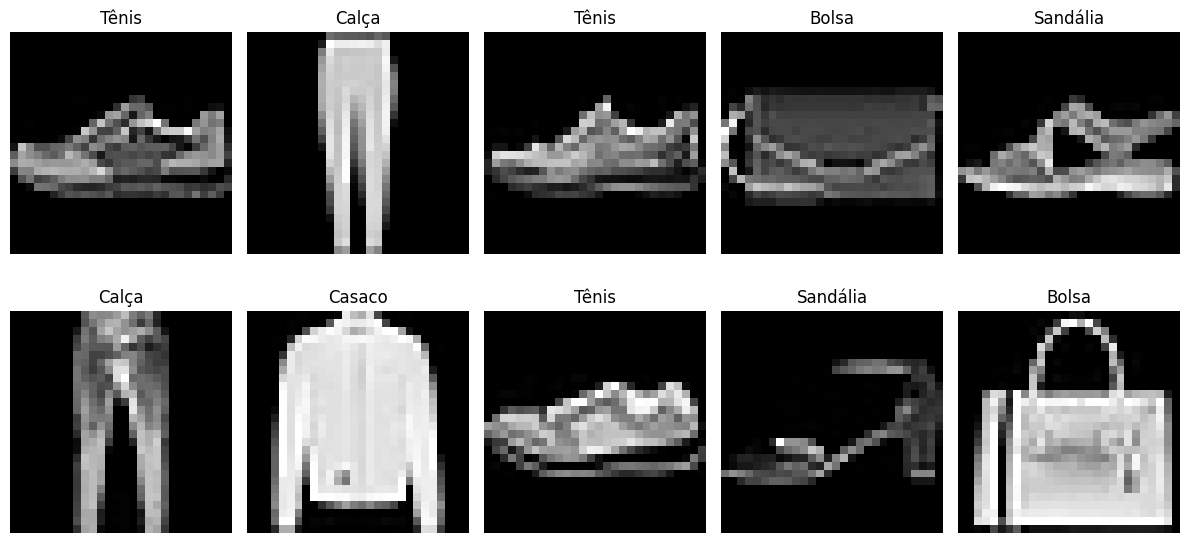

In [17]:
# Visualiza algumas amostras do Fashion-MNIST
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Seleciona uma amostra aleatória
    idx = np.random.randint(0, len(X_fashion))
    image = X_fashion[idx].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'{class_names[y_fashion[idx]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Aplica todas as três técnicas de redução de dimensionalidade ao Fashion-MNIST
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
times = {}

# 1. PCA
print("Aplicando PCA ao Fashion-MNIST...")
start_time = time.time()
pca_fashion = PCA(n_components=2, random_state=42)
X_pca_fashion = pca_fashion.fit_transform(X_fashion_std)
times['PCA'] = time.time() - start_time
print(f"PCA completado em {times['PCA']:.2f} segundos")

scatter1 = axes[0].scatter(X_pca_fashion[:, 0], X_pca_fashion[:, 1],
                          c=y_fashion, cmap='tab10', alpha=0.7, s=10)
axes[0].set_title(f'PCA (Tempo: {times["PCA"]:.2f}s)')
axes[0].set_xlabel('CP1')
axes[0].set_ylabel('CP2')

# 2. t-SNE
print("Aplicando t-SNE ao Fashion-MNIST...")
start_time = time.time()
tsne_fashion = TSNE(n_components=2, perplexity=30, random_state=42,
                   n_iter=1000, learning_rate=200)
X_tsne_fashion = tsne_fashion.fit_transform(X_fashion_std)
times['t-SNE'] = time.time() - start_time
print(f"t-SNE completado em {times['t-SNE']:.2f} segundos")

scatter2 = axes[1].scatter(X_tsne_fashion[:, 0], X_tsne_fashion[:, 1],
                          c=y_fashion, cmap='tab10', alpha=0.7, s=10)
axes[1].set_title(f't-SNE (Tempo: {times["t-SNE"]:.2f}s)')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')

# 3. UMAP
try:
    import umap
    print("Aplicando UMAP ao Fashion-MNIST...")
    start_time = time.time()
    umap_fashion = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    X_umap_fashion = umap_fashion.fit_transform(X_fashion_std)
    times['UMAP'] = time.time() - start_time
    print(f"UMAP completado em {times['UMAP']:.2f} segundos")

    scatter3 = axes[2].scatter(X_umap_fashion[:, 0], X_umap_fashion[:, 1],
                              c=y_fashion, cmap='tab10', alpha=0.7, s=10)
    axes[2].set_title(f'UMAP (Tempo: {times["UMAP"]:.2f}s)')
    axes[2].set_xlabel('UMAP 1')
    axes[2].set_ylabel('UMAP 2')

except ImportError:
    axes[2].text(0.5, 0.5, 'UMAP não disponível\nInstale com:\npip install umap-learn',
                ha='center', va='center', transform=axes[2].transAxes)
    axes[2].set_title('UMAP (não disponível)')

plt.tight_layout()
plt.show()

# Imprime comparação de tempo
print("\n" + "="*50)
print("COMPARAÇÃO DE TEMPO:")
print("="*50)
for method, time_taken in times.items():
    print(f"{method:>10}: {time_taken:>8.2f} segundos")
print("="*50)

Aplicando PCA ao Fashion-MNIST...
PCA completado em 0.26 segundos
Aplicando t-SNE ao Fashion-MNIST...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completado em 48.87 segundos
Aplicando UMAP ao Fashion-MNIST...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## Melhores Práticas e Dicas

### Pré-processamento de Dados:
1. **Padronização**: Sempre padronize seus dados antes de aplicar redução de dimensionalidade
2. **Escalonamento de características**: Garanta que todas as características estejam em escalas similares
3. **Lidar com valores ausentes**: Limpe seus dados antes da redução de dimensionalidade

### Seleção de Parâmetros:

#### t-SNE:
- **Perplexity**: Comece com 30, tente 5-50 para diferentes tamanhos de conjuntos de dados
- **Learning rate**: Tente 10-1000, ajuste se vir clusters estranhos
- **Iterations**: Pelo menos 1000, aumente para melhores resultados
- **Early exaggeration**: Padrão 12.0 geralmente funciona bem

#### UMAP:
- **n_neighbors**: 2-100, valores menores preservam estrutura local
- **min_dist**: 0.0-0.99, valores menores criam clusters mais densos
- **metric**: Tente 'euclidean', 'manhattan', 'cosine' baseado no seu tipo de dados

### Dicas de Performance:
1. **Use PCA primeiro**: Para dados de dimensão muito alta, reduza para ~50 dimensões com PCA primeiro
2. **Amostre grandes conjuntos de dados**: Use um subconjunto para exploração inicial
3. **Processamento paralelo**: Tanto t-SNE quanto UMAP suportam múltiplos núcleos
4. **Considerações de memória**: UMAP é mais eficiente em memória que t-SNE

In [ ]:
# Exemplo prático: Usando PCA como pré-processamento para t-SNE/UMAP
# Esta é uma técnica comum para dados de dimensão muito alta

print("Demonstrando pipeline PCA + t-SNE/UMAP...")

# Passo 1: Reduzir Fashion-MNIST de 784 para 50 dimensões usando PCA
pca_pre = PCA(n_components=50, random_state=42)
X_pca_pre = pca_pre.fit_transform(X_fashion_std)

print(f"Dimensões originais: {X_fashion_std.shape[1]}")
print(f"Após pré-processamento PCA: {X_pca_pre.shape[1]}")
print(f"Variância explicada por 50 componentes: {pca_pre.explained_variance_ratio_.sum():.3f}")

# Passo 2: Aplicar t-SNE aos dados reduzidos por PCA
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

print("\nAplicando t-SNE aos dados pré-processados por PCA...")
start_time = time.time()
tsne_pca = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne_pca = tsne_pca.fit_transform(X_pca_pre)
time_tsne_pca = time.time() - start_time

scatter1 = axes[0].scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],
                          c=y_fashion, cmap='tab10', alpha=0.7, s=10)
axes[0].set_title(f'PCA + t-SNE (Tempo: {time_tsne_pca:.2f}s)')
axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')

# Passo 3: Aplicar UMAP aos dados reduzidos por PCA
try:
    print("Aplicando UMAP aos dados pré-processados por PCA...")
    start_time = time.time()
    umap_pca = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    X_umap_pca = umap_pca.fit_transform(X_pca_pre)
    time_umap_pca = time.time() - start_time

    scatter2 = axes[1].scatter(X_umap_pca[:, 0], X_umap_pca[:, 1],
                              c=y_fashion, cmap='tab10', alpha=0.7, s=10)
    axes[1].set_title(f'PCA + UMAP (Tempo: {time_umap_pca:.2f}s)')
    axes[1].set_xlabel('UMAP 1')
    axes[1].set_ylabel('UMAP 2')

    print(f"t-SNE em dados reduzidos por PCA: {time_tsne_pca:.2f}s")
    print(f"UMAP em dados reduzidos por PCA: {time_umap_pca:.2f}s")

except ImportError:
    axes[1].text(0.5, 0.5, 'UMAP não disponível', ha='center', va='center',
                transform=axes[1].transAxes)
    axes[1].set_title('UMAP (não disponível)')

plt.tight_layout()
plt.show()

print("\nBenefícios do pré-processamento com PCA:")
print("- Computação mais rápida (menos dimensões)")
print("- Redução de ruído (mantendo apenas componentes principais)")
print("- Melhor estabilidade numérica")
print("- Uso reduzido de memória")

## Updated Resources

### Original PCA Resources:
<ul>
    <li><a href="http://scikit-learn.org/stable/modules/decomposition.html#decompositions">Dimensionality Reduction (Scikit Learn Documentation)</a></li>
    <li><a href="http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html">PCA for Iris Dataset (Scikit Learn Documentation)</a></li>
    <li><a href="https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c">A One-Stop Shop for Principal Component Analysis (Matt Brems)</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Dimensionality_reduction">Dimensionality Reduction (Wikipedia)</a></li>
    <li><a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis Explained Visually (setosa.io)</a></li>
</ul>

### t-SNE Resources:
<ul>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">t-SNE Documentation (Scikit-Learn)</a></li>
    <li><a href="https://distill.pub/2016/misread-tsne/">How to Use t-SNE Effectively (Distill.pub)</a></li>
    <li><a href="https://lvdmaaten.github.io/tsne/">Original t-SNE Paper (van der Maaten & Hinton)</a></li>
    <li><a href="https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a">t-SNE Clearly Explained (Towards Data Science)</a></li>
</ul>

### UMAP Resources:
<ul>
    <li><a href="https://umap-learn.readthedocs.io/en/latest/">UMAP Documentation</a></li>
    <li><a href="https://arxiv.org/abs/1802.03426">UMAP Original Paper (McInnes et al.)</a></li>
    <li><a href="https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568">UMAP Explained (Towards Data Science)</a></li>
    <li><a href="https://pair-code.github.io/understanding-umap/">Understanding UMAP (Google PAIR)</a></li>
</ul>

## Conclusão Estendida

Este tutorial cobriu uma gama abrangente de técnicas de redução de dimensionalidade, desde o **PCA** fundamental até métodos não-lineares avançados como **t-SNE** e **UMAP**.

### Principais Pontos:

1. **Escolha a ferramenta certa**:
   - Use **PCA** para relações lineares, pré-processamento e quando a interpretabilidade importa
   - Use **t-SNE** para visualização e exploração de estruturas de dados complexas
   - Use **UMAP** para redução de dimensionalidade de propósito geral, especialmente com grandes conjuntos de dados

2. **Pré-processamento importa**: Sempre padronize seus dados e considere usar PCA como passo de pré-processamento para dados de alta dimensão

3. **Ajuste de parâmetros é crucial**: Experimente com diferentes hiperparâmetros para obter os melhores resultados para seu conjunto de dados específico

4. **Considere recursos computacionais**: Equilibre entre qualidade dos resultados e tempo de computação baseado em suas necessidades

5. **Combine técnicas**: O pipeline PCA + t-SNE/UMAP é uma abordagem poderosa para dados de dimensão muito alta

### O que vem a seguir?

- Experimente com seus próprios conjuntos de dados
- Tente diferentes combinações de hiperparâmetros
- Explore outras técnicas de redução de dimensionalidade como LLE, Isomap, ou autoencoders
- Use redução de dimensionalidade como pré-processamento para modelos de machine learning

Obrigado por acompanhar este tutorial estendido sobre redução de dimensionalidade! A combinação dessas técnicas fornece um poderoso conjunto de ferramentas para explorar e entender dados de alta dimensão.